In [ ]:
import os
import torch
from torchvision import models, transforms
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from PIL import Image
import matplotlib.pyplot as plt

# Define the base directory where your images are stored
base_dir = '/Users/skyzhao/UC Davis/Clubs/AISC/furniture'  # Modify this path to your folder location

# Define transformation for Faster R-CNN input
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the Faster R-CNN model (pretrained)
model = models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.eval()  # Set model to evaluation mode

# Function to load and transform images
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Open image and convert to RGB
    return transform(image).unsqueeze(0)  # Add batch dimension

# Function to recursively find all image files in the directory
def get_all_images(base_dir):
    image_paths = []
    for root, dirs, files in os.walk(base_dir):  # Traverse through subdirectories
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Ensure it's an image
                image_paths.append(os.path.join(root, file))
    return image_paths

def run_inference(base_dir, max_images=10):
    image_paths = get_all_images(base_dir)[:max_images]  # Limit to the first 'max_images' images
    for image_path in image_paths:
        image_tensor = load_image(image_path)
        
        with torch.no_grad():  # Inference without gradient calculation
            prediction = model(image_tensor)  # Run Faster R-CNN
            
        # Get predicted boxes, labels, and scores
        boxes = prediction[0]['boxes']
        labels = prediction[0]['labels']
        scores = prediction[0]['scores']
        
        print(f"Predictions for {image_path}:")
        print(f"Boxes: {boxes}")
        print(f"Labels: {labels}")
        print(f"Scores: {scores}")
        
        # Display results (if confident enough)
        fig, ax = plt.subplots(1, figsize=(12,9))
        ax.imshow(Image.open(image_path))
        
        for i in range(len(boxes)):
            if scores[i] > 0.3:  # Lowered the confidence threshold
                box = boxes[i].cpu().numpy()
                ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                           fill=False, color='red', linewidth=3))
                ax.text(box[0], box[1], f'{labels[i].item()} ({scores[i]:.2f})',
                        fontsize=10, color='red', bbox=dict(facecolor='yellow', alpha=0.5))
        
        plt.title(f"Predictions for {image_path}")
        plt.show()

# Run inference on the first 10 images
run_inference(base_dir, max_images=10)


Predictions for furniture/chair/image_2341.jpeg:
Boxes: tensor([[  0.6049, 149.9261, 132.0000, 197.8941],
        [  0.7214, 150.3716, 132.0000, 197.7698],
        [  8.8863, 109.5464, 132.0000, 198.0000],
        [ 27.5050,  64.6634,  68.2493, 102.6340],
        [ 33.1246,  67.4703,  65.3698,  99.8590],
        [  1.0454,   2.4328, 122.7726,  61.0306],
        [  8.1451, 108.7610, 132.0000, 197.9700],
        [  0.0000, 150.1239, 132.0000, 197.6762],
        [  5.7988,   0.0000, 132.0000, 115.2202],
        [  3.1453,   0.0000, 132.0000, 115.6176],
        [ 10.5956,   0.8267, 132.0000, 113.3378]])
Labels: tensor([51, 67, 63,  1, 70, 51,  3, 81,  3, 63, 51])
Scores: tensor([0.1645, 0.1599, 0.1316, 0.1156, 0.1087, 0.1023, 0.1010, 0.0997, 0.0887,
        0.0804, 0.0788])


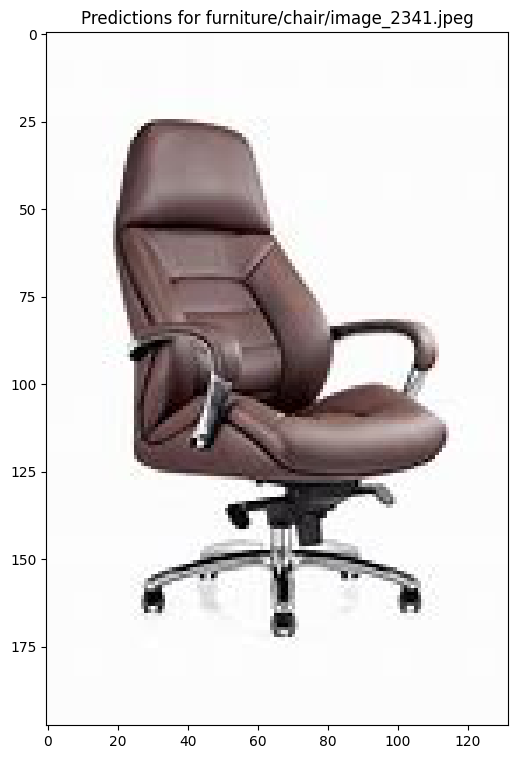

Predictions for furniture/chair/image_947.jpeg:
Boxes: tensor([[ 59.5152,   0.0000, 207.0000, 123.2779],
        [ 10.9141, 131.1776, 206.8833, 207.0000],
        [  4.3904, 130.8316, 207.0000, 207.0000],
        [  0.0000, 131.1505, 207.0000, 206.9802],
        [  0.4205, 121.4039, 207.0000, 207.0000],
        [  6.5343, 118.7518, 207.0000, 207.0000]])
Labels: tensor([ 3, 51, 81, 67, 63,  3])
Scores: tensor([0.1088, 0.0898, 0.0850, 0.0733, 0.0614, 0.0541])


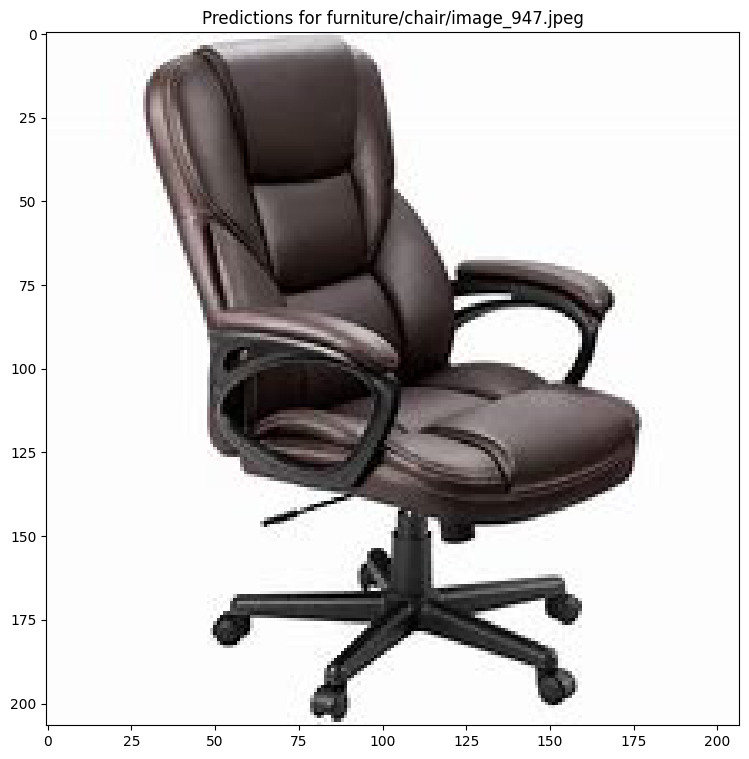

Predictions for furniture/chair/image_1994.jpeg:
Boxes: tensor([[4.2027e+00, 4.1856e+00, 1.1157e+02, 6.7305e+01],
        [3.2845e+00, 1.4215e+02, 1.5000e+02, 2.0000e+02],
        [3.8912e+01, 0.0000e+00, 1.5000e+02, 8.8283e+01],
        [3.5191e-01, 1.3504e+02, 1.5000e+02, 2.0000e+02],
        [4.7583e+00, 1.4149e+02, 1.5000e+02, 2.0000e+02],
        [0.0000e+00, 1.1227e+02, 1.4887e+02, 2.0000e+02],
        [1.5123e+00, 1.1734e+02, 8.8991e+01, 2.0000e+02],
        [1.4339e-01, 1.4141e+02, 1.5000e+02, 2.0000e+02],
        [7.2963e-01, 1.1305e+02, 9.4009e+01, 2.0000e+02],
        [0.0000e+00, 6.3493e+01, 1.0122e+02, 2.0000e+02]])
Labels: tensor([51, 67,  3, 63, 51,  3, 17, 81, 62,  3])
Scores: tensor([0.1519, 0.1076, 0.1036, 0.1021, 0.1003, 0.0796, 0.0784, 0.0662, 0.0630,
        0.0515])


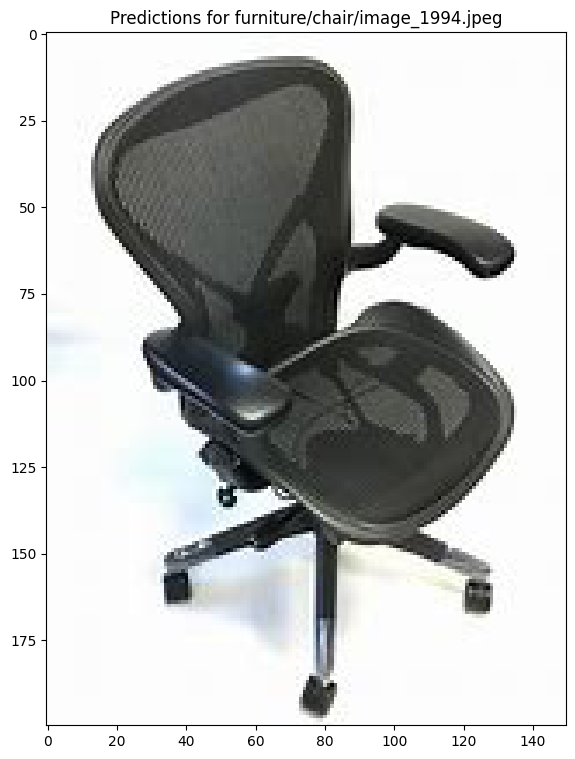

Predictions for furniture/chair/image_2711.jpeg:
Boxes: tensor([[ 79.3543,  95.5702, 102.8249, 115.9501],
        [ 86.8102, 160.3336,  96.2097, 174.6694],
        [ 52.2020,  89.5829, 186.0000, 185.8430],
        [  2.6655, 100.4486, 186.0000, 185.2887],
        [ 73.2425,   0.0000, 186.0000, 112.9557],
        [ 48.0657,  91.1082, 186.0000, 186.0000],
        [ 75.6037,  76.2967, 186.0000, 186.0000],
        [  0.0000,  81.8460, 138.7857, 185.0601],
        [ 98.7933,   0.9349, 186.0000, 143.7822]])
Labels: tensor([ 3, 10,  3, 67,  3, 63,  1,  3, 51])
Scores: tensor([0.4546, 0.3867, 0.1247, 0.1144, 0.1140, 0.0736, 0.0609, 0.0552, 0.0503])


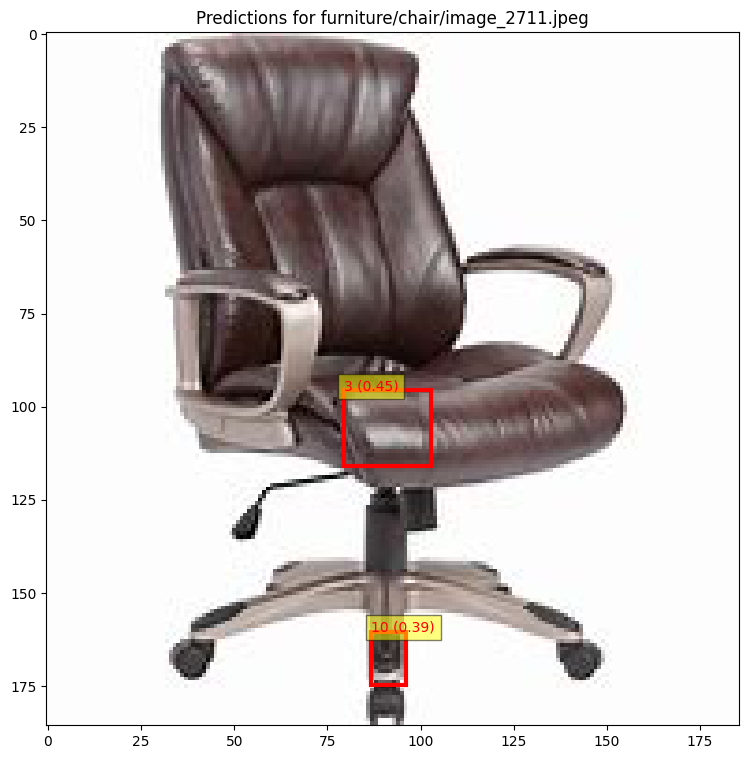

Predictions for furniture/chair/image_1097.jpeg:
Boxes: tensor([[ 10.7131,   0.0000, 188.0000, 136.1593],
        [ 74.7532,   0.4181, 188.0000, 100.2160]])
Labels: tensor([ 1, 63])
Scores: tensor([0.3019, 0.0524])


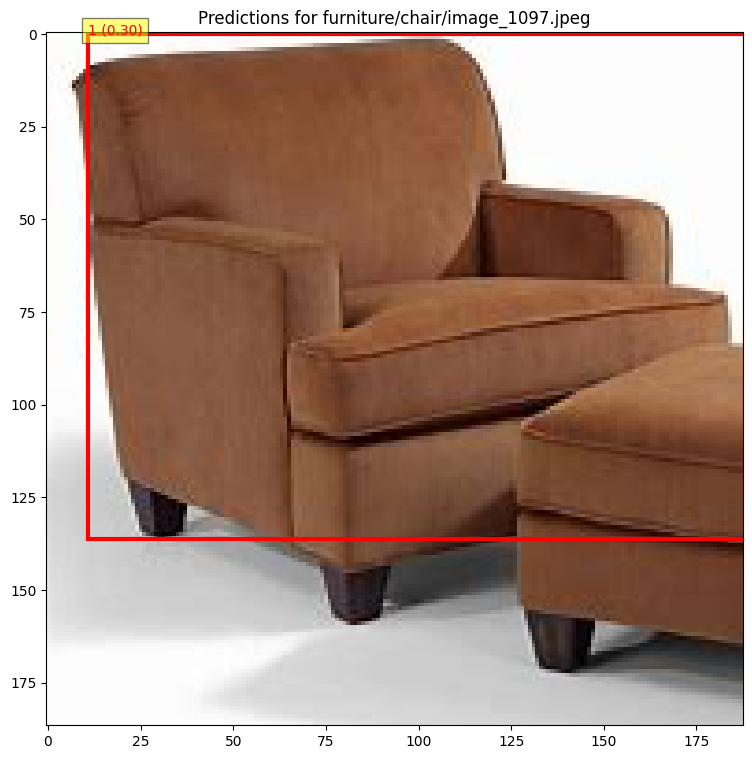

Predictions for furniture/chair/image_414.jpeg:
Boxes: tensor([[ 68.7537, 148.2273, 114.7993, 191.3654],
        [172.0120, 116.9295, 196.0000, 166.6542],
        [111.8215, 136.3690, 195.7551, 192.1408],
        [157.3293,  68.2624, 168.7024,  80.5777]])
Labels: tensor([15, 15, 15,  3])
Scores: tensor([0.8483, 0.3992, 0.2732, 0.1235])


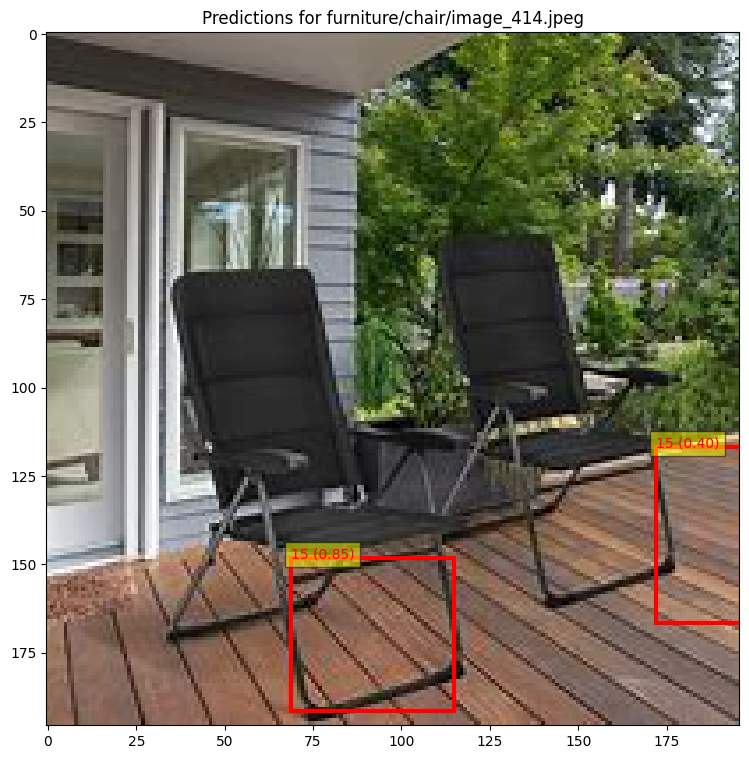

Predictions for furniture/chair/image_101.jpeg:
Boxes: tensor([[ 84.9095,   0.0000, 225.0000, 112.6470],
        [ 62.8525,   0.0000, 181.8272, 119.2087],
        [  0.0000, 144.5384, 225.0000, 220.0000],
        [ 10.5010, 145.7508, 220.3780, 220.0000],
        [ 94.1884,  58.5275, 225.0000, 220.0000],
        [ 96.4896,   0.0000, 225.0000, 154.7944],
        [  2.7110, 144.8400, 225.0000, 220.0000],
        [  0.0000,   0.0000, 116.5238, 140.0615]])
Labels: tensor([ 3,  1, 67, 51,  3, 63, 81,  3])
Scores: tensor([0.1357, 0.0824, 0.0807, 0.0676, 0.0597, 0.0565, 0.0520, 0.0504])


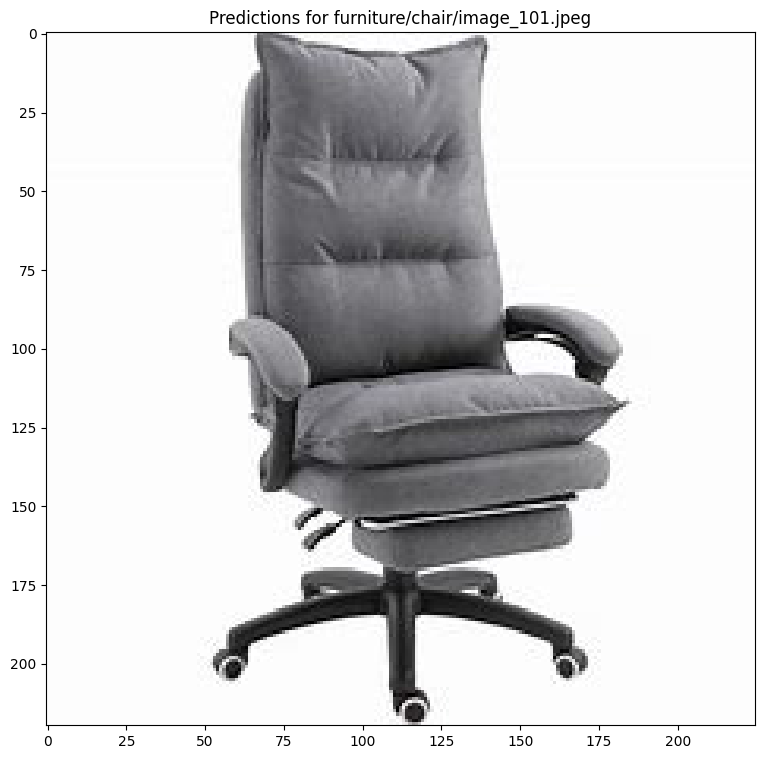

Predictions for furniture/chair/image_1428.jpeg:
Boxes: tensor([[191.7847, 184.0477, 206.1177, 196.6279],
        [142.9323, 137.9427, 165.1326, 155.6263],
        [  0.0000,  97.8855, 138.9411, 212.1778]])
Labels: tensor([10,  3, 81])
Scores: tensor([0.3535, 0.0848, 0.0529])


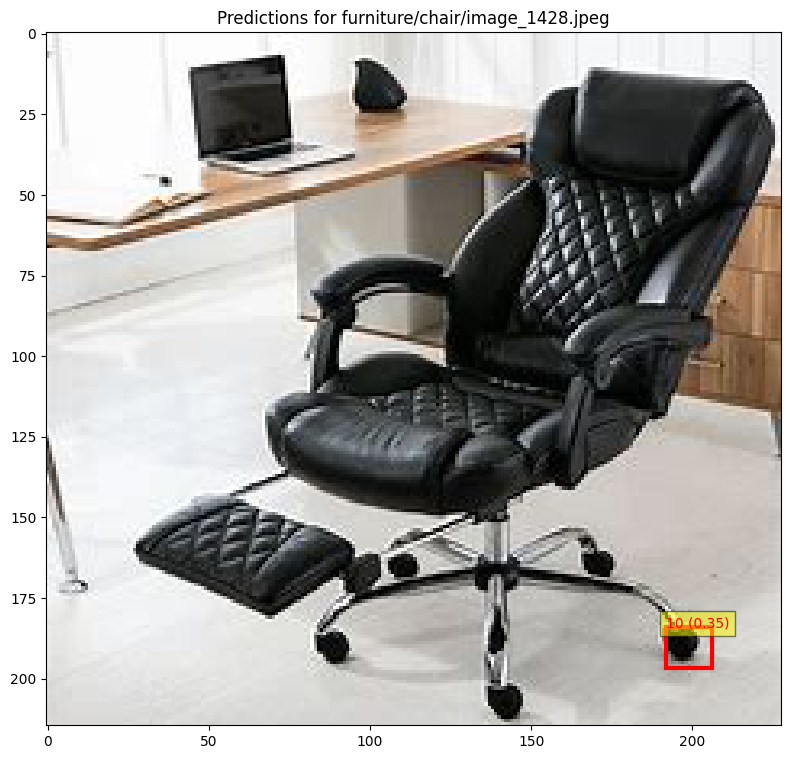

Predictions for furniture/chair/image_551.jpeg:
Boxes: tensor([[ 33.5088,  66.5299, 196.0000, 159.9987],
        [ 37.0777, 108.5536, 196.0000, 191.5691],
        [131.5711,  56.3944, 189.4107,  87.5742]])
Labels: tensor([ 3, 81,  3])
Scores: tensor([0.0897, 0.0673, 0.0526])


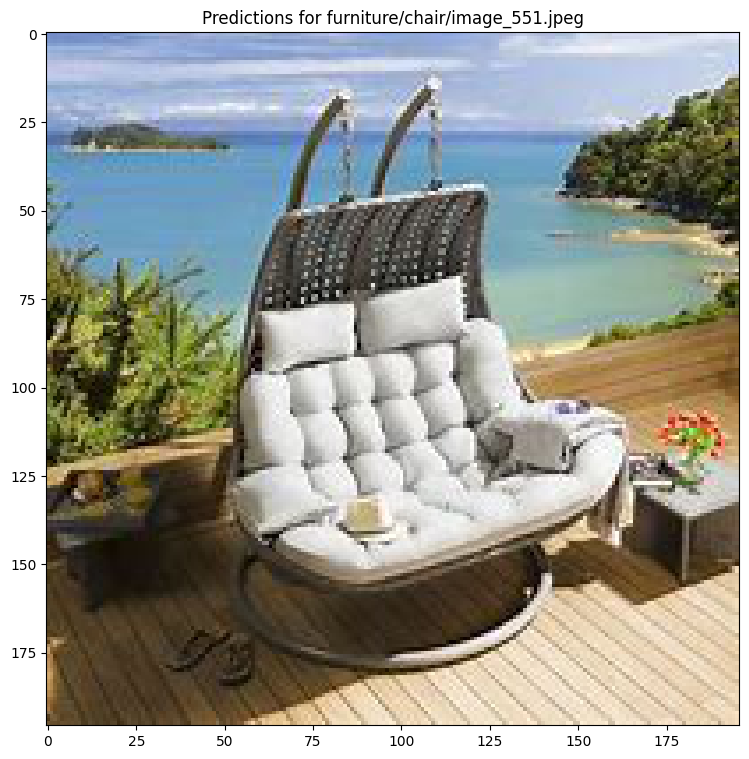

Predictions for furniture/chair/image_1582.jpeg:
Boxes: tensor([[5.4646e+00, 1.0433e+02, 1.9800e+02, 1.9796e+02],
        [0.0000e+00, 1.0402e+02, 1.9800e+02, 1.9790e+02],
        [0.0000e+00, 9.2020e+01, 1.9800e+02, 1.9782e+02],
        [1.9116e-01, 1.0403e+02, 1.9800e+02, 1.9800e+02],
        [0.0000e+00, 6.8315e+01, 1.9800e+02, 1.9800e+02]])
Labels: tensor([51, 67, 63, 81,  3])
Scores: tensor([0.1181, 0.1034, 0.0995, 0.0927, 0.0781])


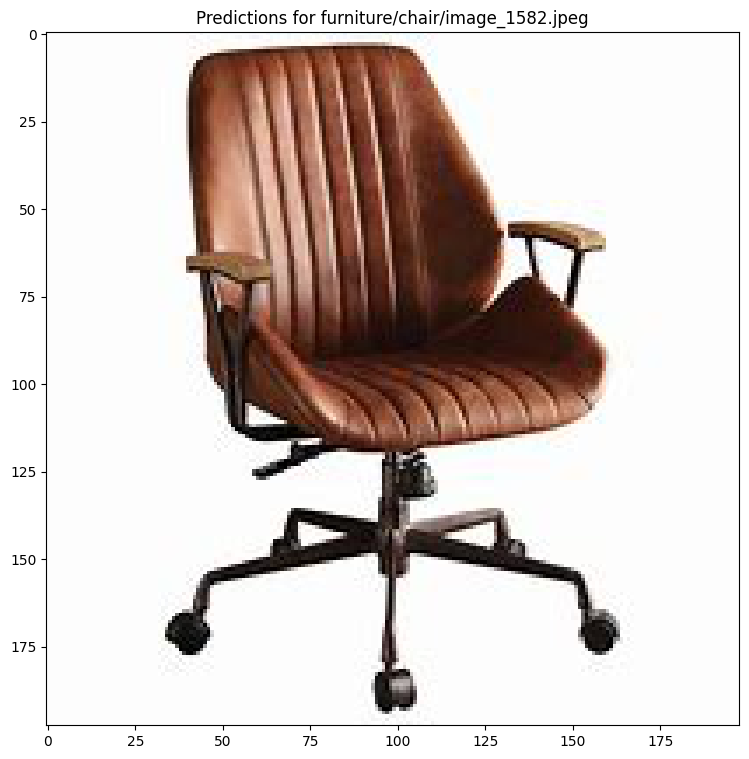

In [1]:
import os
import torch
from torchvision import models, transforms
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from PIL import Image
import matplotlib.pyplot as plt

# Define the base directory where your images are stored
base_dir = 'furniture'  # Modify this path to your folder location

# Define transformation for Faster R-CNN input
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the Faster R-CNN model (pretrained)
model = models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.eval()  # Set model to evaluation mode

# Function to load and transform images
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Open image and convert to RGB
    return transform(image).unsqueeze(0)  # Add batch dimension

# Function to recursively find all image files in the directory
def get_all_images(base_dir):
    image_paths = []
    for root, dirs, files in os.walk(base_dir):  # Traverse through subdirectories
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Ensure it's an image
                image_paths.append(os.path.join(root, file))
    return image_paths

# Run inference on a subset of images
def run_inference(base_dir, max_images=10):
    image_paths = get_all_images(base_dir)[:max_images]  # Limit to the first 'max_images' images
    for image_path in image_paths:
        image_tensor = load_image(image_path)  # Load and transform the image
        
        with torch.no_grad():  # Disable gradient calculation for inference
            prediction = model(image_tensor)  # Run Faster R-CNN
            
        # Get predicted boxes, labels, and scores
        boxes = prediction[0]['boxes']
        labels = prediction[0]['labels']
        scores = prediction[0]['scores']
        
        print(f"Predictions for {image_path}:")
        print(f"Boxes: {boxes}")
        print(f"Labels: {labels}")
        print(f"Scores: {scores}")
        
        # Display results (only for predictions above the threshold)
        fig, ax = plt.subplots(1, figsize=(12, 9))
        ax.imshow(Image.open(image_path))  # Show the image
        
        for i in range(len(boxes)):
            if scores[i] > 0.3:  # Only display predictions with score > 0.3
                box = boxes[i].cpu().numpy()
                ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                           fill=False, color='red', linewidth=3))
                ax.text(box[0], box[1], f'{labels[i].item()} ({scores[i]:.2f})',
                        fontsize=10, color='red', bbox=dict(facecolor='yellow', alpha=0.5))
        
        plt.title(f"Predictions for {image_path}")
        plt.show()

# Run inference on the first 10 images
run_inference(base_dir, max_images=10)


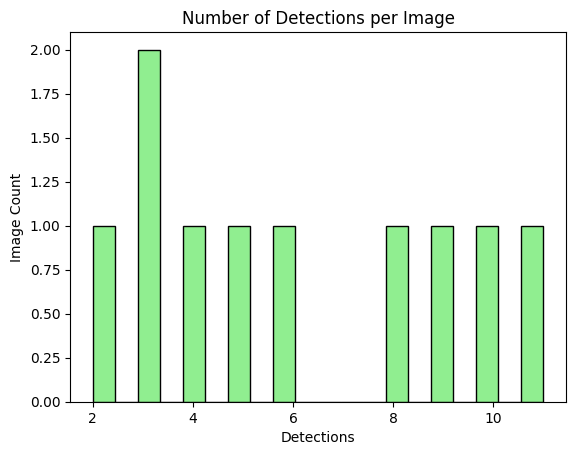

Average detections per image: 6.10
Pseudo Accuracy (images with >= 0.5 confidence detection): 10.00%


In [9]:
def evaluate_detection_density(base_dir, max_images=100):
    image_paths = get_all_images(base_dir)[:max_images]
    num_detections = []

    for image_path in image_paths:
        image_tensor = load_image(image_path)

        with torch.no_grad():
            prediction = model(image_tensor)

        boxes = prediction[0]['boxes']
        num_detections.append(len(boxes))

    plt.hist(num_detections, bins=20, color='lightgreen', edgecolor='black')
    plt.title("Number of Detections per Image")
    plt.xlabel("Detections")
    plt.ylabel("Image Count")
    plt.show()

    print(f"Average detections per image: {sum(num_detections)/len(num_detections):.2f}")

    high_conf_count = 0  # Count images with at least 1 high-confidence detection
    threshold = 0.5      # Confidence threshold

    for image_path in image_paths:
        image_tensor = load_image(image_path)

        with torch.no_grad():
            prediction = model(image_tensor)

        scores = prediction[0]['scores'].cpu().numpy() if 'scores' in prediction[0] else []

        if any(score >= threshold for score in scores):
            high_conf_count += 1

    pseudo_accuracy = (high_conf_count / len(image_paths)) * 100
    print(f"Pseudo Accuracy (images with >= {threshold} confidence detection): {pseudo_accuracy:.2f}%")

evaluate_detection_density(base_dir, max_images=10)